# DECISION TREE CLASSIFIER

## THIS DATA ANALYSIS IS DONE BY SAKSHI K MORE

### THE DATASET CONSISTS OF SALARY DATA WHICH IS TAKEN FROM KAGGLE.COM

##### importing all the required libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz

##### loading the salary dataset

In [33]:
data=pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### DATA CLEANING

##### displaying all the columns in the dataset

In [34]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

##### displaying the shape of the data

In [35]:
data.shape

(215, 15)

##### Lets check if the data contains any null value or no

In [77]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

##### checking the data types of the columns of the dataset

In [37]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

##### lets check the count of the students that are placed in campus recruitment

In [79]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

##### lets find the describe of the numerical columns of the datset. This will help us to see the min and max percentages obtained at each level and also the minimum and maximum salary received by the students

##### we can also see the average salary received and teh average marks obtained

In [80]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


##### Lets fill the null values in the dataset with 0

In [84]:
data.fillna(0,inplace=True)

### DATA VISUALIZATION

##### lets see the count of the students based on their HSC stream and categorizing them based on gender

Text(0.5, 1.0, 'HSC stream wise count of people')

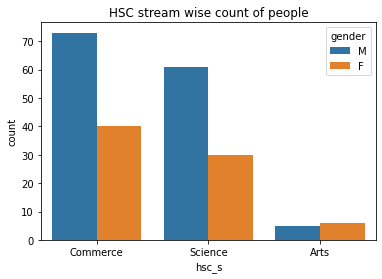

In [81]:
sns.countplot(x='hsc_s',data=data,hue='gender')
plt.title("HSC stream wise count of people")

##### with the help of the pie chart , lets find which type of degree is persued by maximum number of students

Text(0.5, 1.0, 'Distribution of People as per their Degree')

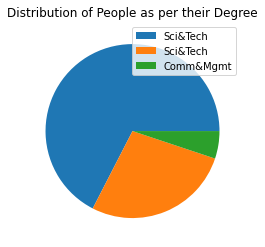

In [82]:
plt.pie(x=data['degree_t'].value_counts())
plt.legend(data['degree_t'])
plt.title("Distribution of People as per their Degree")

##### lets check with the help of the countplot that which type of specialisation is more preferred by students

Text(0.5, 1.0, 'Specialisation Count')

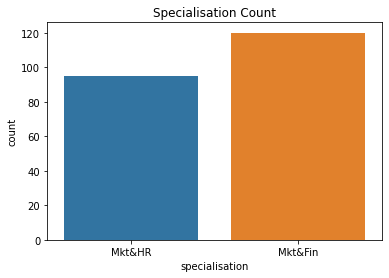

In [83]:
sns.countplot(x='specialisation',data=data)
plt.title("Specialisation Count")

### MODEL CREATION - DECISION TREE CLASSIFIER

##### lets split the data into training and testing set

In [88]:
x=data[['ssc_p','hsc_p','degree_p','etest_p','mba_p']] 

In [89]:
y=data['salary'] 

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##### create a decision tree classifier model

In [91]:
DTC=DecisionTreeClassifier(max_depth=3)

##### lets train the model with the data

In [92]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

##### with the help of the model, lets predict the values

In [93]:
y_prediction=DTC.predict(x_test)

##### checking the accuracy of the data generated by our model

In [94]:
acc_score=accuracy_score(y_test,y_prediction)
print("Accuracy score of the prediction is : ",acc_score)

Accuracy score of the prediction is :  0.18604651162790697


this shows that our model does not predict properly and give poor quality results

##### visualize the decision tree

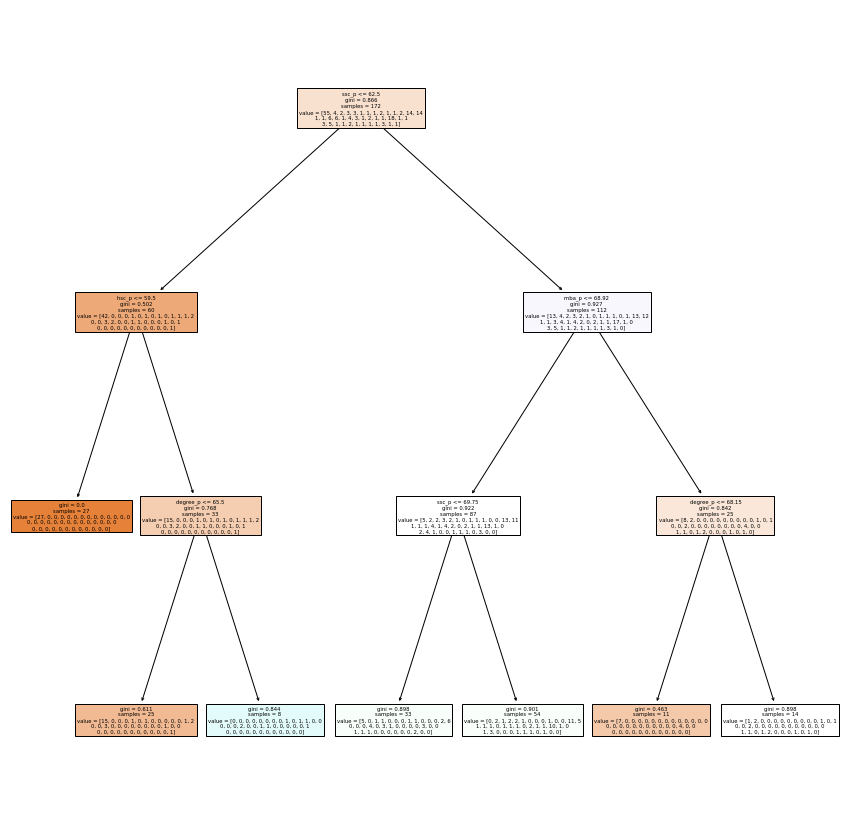

In [95]:
plt.figure(figsize=(15,15))
plot_tree(DTC,filled=True,feature_names=x.columns)
plt.show()